In [1]:
import pandas as pd
import acquire
from prepare import basic_prepare

import re
import unicodedata
import pandas as pd
import nltk

MissingSchema: Invalid URL '': No scheme supplied. Perhaps you meant http://?

In [2]:
# getting data and cleaned data
df = acquire.get_data()

NameError: name 'acquire' is not defined

In [6]:
df = basic_prepare(df)

ValueError: Expected object or value

In [3]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

In [4]:
# get columsn
df.columns

Index(['repo', 'language', 'readme_contents', 'basic_clean_with_code', 'spacy',
       'lem'],
      dtype='object')

In [5]:
show_counts_and_ratios(df, 'language').index

Index(['JavaScript', 'Objective-C', 'Java', 'Ruby', 'Go', 'Swift',
       'TypeScript', 'CSS', 'Scala', 'Jupyter Notebook', 'Clojure', 'Vue',
       'PHP', 'Erlang', 'Elm', 'HTML', 'Python'],
      dtype='object')

##### Takeaways:
* We want to rename all the languages to 'JavaScript', 'Objective-C', 'Java', 'Ruby', 'Other' for a simplification of the the classifications

In [8]:
# establishing the mask
mask = (df['language']  != 'JavaScript') & (df['language']  !='Objective-C') & (df['language']  != 'Java') & (df['language']  != 'Ruby')

In [24]:
df[mask].loc[:,'language'] = 'Other'

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_1239/3643880778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mask].loc[:,'language'] = 'Other'


In [33]:
# changes the languages to be other tht are not in the top
df['language'] = df.language.str.replace('Go', 'Other').str.replace('Swift', 'Other' ).str.replace('TypeScript', 'Other' ).str.replace('CSS', 'Other').str.replace('Scala', 'Other').str.replace('Jupyter Notebook', 'Other').str.replace('Clojure', 'Other').str.replace('Vue', 'Other').str.replace('PHP', 'Other').str.replace('Erlang', 'Other').str.replace('Elm', 'Other').str.replace('HTML', 'Other').str.replace('Python', 'Other')

In [35]:
show_counts_and_ratios(df, 'language')

,n,percent
JavaScript,30,0.322581
Other,28,0.301075
Objective-C,15,0.161290
Java,10,0.107527
Ruby,10,0.107527


### What are the most common words in READMEs?

In [74]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ['use', '9', '1', 'include']
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [67]:
# getting list of words for each 
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].spacy))
other_words = clean(' '.join(df[df.language == 'Other'].spacy))
objective_words = clean(' '.join(df[df.language == 'Objective-C'].spacy))
java_words = clean(' '.join(df[df.language == 'Java'].spacy))
ruby_words = clean(' '.join(df[df.language == 'Ruby'].spacy))
all_words = clean(' '.join(df.spacy))

In [68]:
# getting words frequencies
javascript_freq = pd.Series(javascript_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
objective_freq = pd.Series(objective_words).value_counts()
ruby_freq = pd.Series(ruby_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [69]:
# THe is an collection of alll the words anc things, It seems that the cleaning done needs to be improved for the results of this to come back with something useful. I seem to have made mostakes in the cleaning process
word_counts = (pd.concat([all_freq, ruby_freq, objective_freq, other_freq, java_freq, javascript_freq], axis=1, sort=True)
                .set_axis(['all', 'ruby', 'objective', 'other', 'java', 'javascript'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

# 
word_counts.head()

,all,ruby,objective,other,java,javascript
0,87,4,10,20,0,38
00,1,0,1,0,0,0
000,4,0,0,4,0,0
000000,1,0,0,0,0,1
000001,1,0,0,0,0,1


In [ ]:
['use', '9', '1', 'include']

In [73]:
# all is used first
# Most common
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ruby,objective,other,java,javascript
function,338,3,0,70,0,168
javascript,282,9,0,8,0,183
set,266,35,30,107,3,86
return,256,8,34,82,5,73
version,204,80,26,44,6,43
file,191,26,25,72,15,44
var,191,0,0,17,0,46
name,184,37,3,43,7,42
example,181,29,28,54,2,60
option,179,33,2,18,1,117


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

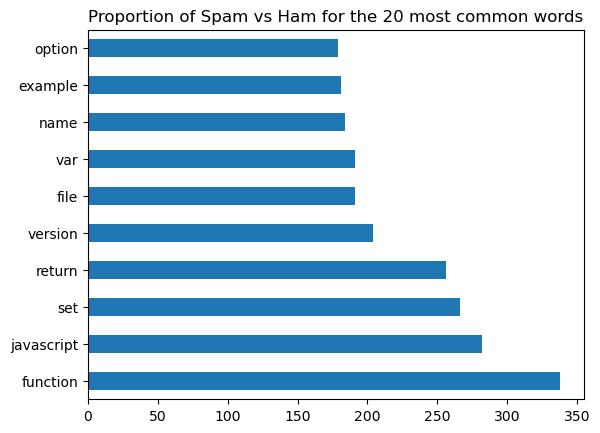

In [83]:
# figure out the percentage of spam vs ham
word_counts['all'].sort_values(ascending=False).head(10).plot.barh()

plt.title('Proportion of Spam vs Ham for the 20 most common words')

### Does the length of the README vary by programming language?

### Do different programming languages use a different number of unique words?

### Are there any words that uniquely identify a programming language?